# **1. Exploratory Data Analysis (EDA)**

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import plotly.express as px
from sklearn.manifold import TSNE, MDS

np.random.seed(23)

#### **Dataset**

The dataset is from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), collected and analysed by the Machine Learning Group of UTA (The Universit of Texes at Arlington)

In [2]:
#csv file link = https://drive.google.com/file/d/15WfSLQJW08Cy0h529sGdMxboDKLBuN1p/view?usp=sharing
#zipfile link = https://drive.google.com/file/d/1QkHJk4vq5lQocu5WFeXI9HtxkXhwVD22/view?usp=sharing

The following code snippet downloads the dataset, shared publicly on my google drive.

In [3]:
# !wget --quiet --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15WfSLQJW08Cy0h529sGdMxboDKLBuN1p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15WfSLQJW08Cy0h529sGdMxboDKLBuN1p" -O creditcard.csv && rm -rf /tmp/cookies.txt

In [4]:
raw_data = pd.read_csv('data/creditcard.csv') 
df = raw_data.copy()
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### **1.1 Descriptive Statistics**

In [5]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### All input variables are floating point values and the output variable is an integer

#### **1.1.1 Shape of Dataset**

In [7]:
df.shape

(284807, 31)

#### The dataset contains 284,807 transactions(data points) with 31 columns. 
- first 30 columns are the input variables
- last column is the output variable

#### **1.1.2 Checking for missing values**

In [8]:
df.isna().sum().sum()

0

#### **1.1.3 Summary**
1. There are 284,807 rows(cases) and 31 columns(30 predictor variables and 1 response variable)
2. The first column is `Time`
3. The next 28 columns `V1`, `V2`, ..., `V28` are the Principal Components obtained with PCA on the original features(names not provided due to confidentiality issues.)
4. The last predictor variable(30th column) is `Amount` in the transaction
5. `Time` and `Amount` are the only two features on which PCA is not applied.
6. The last column `class` is the response variable
7. Size of the Dataset = 284,807 data points
8. No. of Input Variables (Features) = 31
9. No. of Output Variables = 1  ( values $\in$ {0,1} )
10. All the predictor variables are floating point values and the response variable is an integer
11. There are no missing values

### **1.2 Univariate and Bivariate Analysis**

In [9]:
def basic_details(df):
    no_of_obs = df.shape[0]
    types = df.dtypes
    unique_values = df.apply(lambda x: [x.unique()])
    min = df.apply(lambda x: x.min())
    mean = df.apply(lambda x: x.mean())
    std = df.apply(lambda x: x.std())
    max = df.apply(lambda x: x.max())
    nulls = pd.Series(df.isnull().sum())
    distinct_values = df.apply(lambda x: x.unique().shape[0])
    missing_ration = df.apply(lambda x: (x.isnull().sum()/no_of_obs)*100)
    skewness = df.skew()
    kurtosis = df.kurt()
    details_df = pd.concat([types, min, max, std, mean, distinct_values, skewness, kurtosis], axis=1)
    column_names = ['dtype', 'min','max', 'std', 'mean','distinct values','skewness','kurtosis']
    details_df.columns = column_names

    return details_df

In [10]:
basic_details(df)

dtype         min            max           std          mean  \
Time    float64    0.000000  172792.000000  47488.145955  9.481386e+04   
V1      float64  -56.407510       2.454930      1.958696  1.168375e-15   
V2      float64  -72.715728      22.057729      1.651309  3.416908e-16   
V3      float64  -48.325589       9.382558      1.516255 -1.379537e-15   
V4      float64   -5.683171      16.875344      1.415869  2.074095e-15   
V5      float64 -113.743307      34.801666      1.380247  9.604066e-16   
V6      float64  -26.160506      73.301626      1.332271  1.487313e-15   
V7      float64  -43.557242     120.589494      1.237094 -5.556467e-16   
V8      float64  -73.216718      20.007208      1.194353  1.213481e-16   
V9      float64  -13.434066      15.594995      1.098632 -2.406331e-15   
V10     float64  -24.588262      23.745136      1.088850  2.239053e-15   
V11     float64   -4.797473      12.018913      1.020713  1.673327e-15   
V12     float64  -18.683715       7.848392      0.999201 -1.247012e-15   
V13     float64   -5.791881       7.126883      0.995274  8.190001e-16   
V14     float64  -19.214325      10.526766      0.958596  1.207294e-15   
V15     float64   -4.498945       8.877742      0.915316  4.887456e-15   
V16     float64  -14.129855      17.315112      0.876253  1.437716e-15   
V17     float64  -25.162799       9.253526      0.849337 -3.772171e-16   
V18     float64   -9.498746       5.041069      0.838176  9.564149e-16   
V19     float64   -7.213527       5.591971      0.814041  1.039917e-15   
V20     float64  -54.497720      39.420904      0.770925  6.406204e-16   
V21     float64  -34.830382      27.202839      0.734524  1.654067e-16   
V22     float64  -10.933144      10.503090      0.725702 -3.568593e-16   
V23     float64  -44.807735      22.528412      0.624460  2.578648e-16   
V24     float64   -2.836627       4.584549      0.605647  4.473266e-15   
V25     float64  -10.295397       7.519589      0.521278  5.340915e-16   
V26     float64   -2.604551       3.517346      0.482227  1.683437e-15   
V27     float64  -22.565679      31.612198      0.403632 -3.660091e-16   
V28     float64  -15.430084      33.847808      0.330083 -1.227390e-16   
Amount  float64    0.000000   25691.160000    250.120109  8.834962e+01   
Class     int64    0.000000       1.000000      0.041527  1.727486e-03   

        distinct values   skewness    kurtosis  
Time             124592  -0.035568   -1.293530  
V1               275663  -3.280667   32.486679  
V2               275663  -4.624866   95.773106  
V3               275663  -2.240155   26.619551  
V4               275663   0.676292    2.635455  
V5               275663  -2.425901  206.904560  
V6               275663   1.826581   42.642494  
V7               275663   2.553907  405.607417  
V8               275663  -8.521944  220.586974  
V9               275663   0.554680    3.731311  
V10              275663   1.187141   31.988239  
V11              275663   0.356506    1.633921  
V12              275663  -2.278401   20.241870  
V13              275663   0.065233    0.195300  
V14              275663  -1.995176   23.879462  
V15              275663  -0.308423    0.284769  
V16              275663  -1.100966   10.419131  
V17              275663  -3.844914   94.799719  
V18              275663  -0.259880    2.578341  
V19              275663   0.109192    1.724970  
V20              275663  -2.037155  271.016113  
V21              275663   3.592991  207.287040  
V22              275663  -0.213258    2.832967  
V23              275663  -5.875140  440.088659  
V24              275663  -0.552499    0.618871  
V25              275663  -0.415793    4.290412  
V26              275663   0.576693    0.919006  
V27              275663  -1.170209  244.989241  
V28              275663  11.192091  933.397502  
Amount            32767  16.977724  845.092646  
Class                 2  23.997579  573.887843

-  As the predictor variables `V1`, `V2`,....`V28` are already transformed using 
PCA, it does not make much sense to plot the distributions of these variables and interpret.
- It makes more sense to plot the distributions of the variables `Time`, `Amount` and `Class` and make interpretations.

##### `Time`

### (Q1) Does Fraud transactions occur during a specific time period?

In [11]:
175000/(60*60)

48.611111111111114

#### The dataset contains sequential transactions that occurred for ~2 days. 

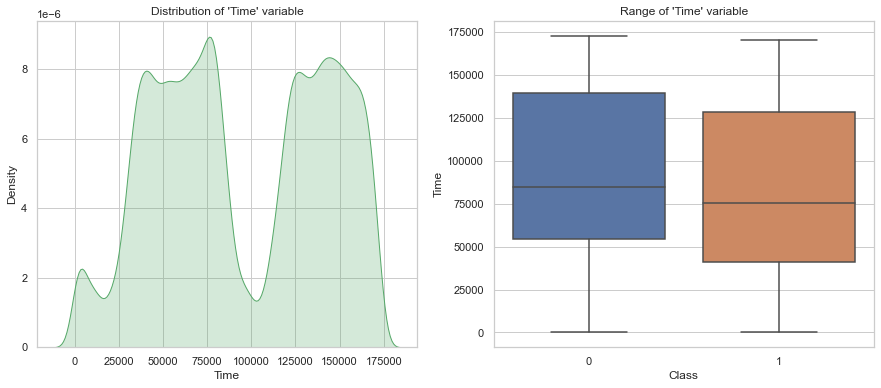

In [12]:
# sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.kdeplot(data=df, x="Time", color='g',fill=True, ax=axes[0])
sns.boxplot(x="Class", y="Time", data=df)
axes[0].set_title("Distribution of 'Time' variable")
axes[1].set_title("Range of 'Time' variable")
plt.show()

### (A) No, from the box plot, there seems to be no specific time period for fraud transactions. They seem to occur at any time along with normal transactions. 

##### `Amount` 

### (Q2) Does fraud transactions occur for a specific range of amount?

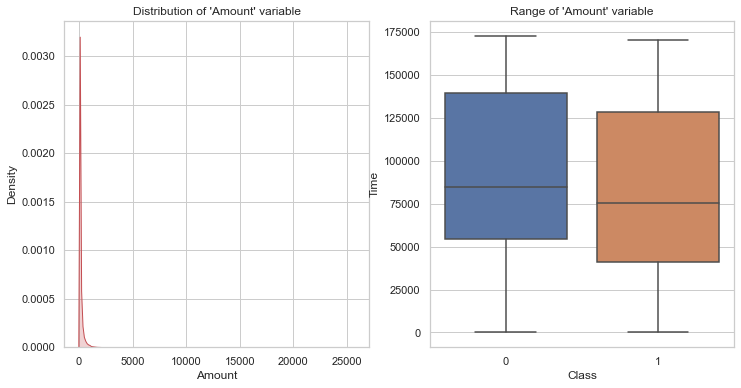

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.kdeplot(data=df, x="Amount", color='r',fill=True, ax=axes[0])
sns.boxplot(x="Class", y="Time", data = df, ax=axes[1])
axes[0].set_title("Distribution of 'Amount' variable")
axes[1].set_title("Range of 'Amount' variable")
plt.show()

### (A) No, from the box plot, we can see that fraud transactions occur for all ranges of amounts similar to those of normal transactions.

##### `Class`

### (Q3) How frequent are the fraud transactions?

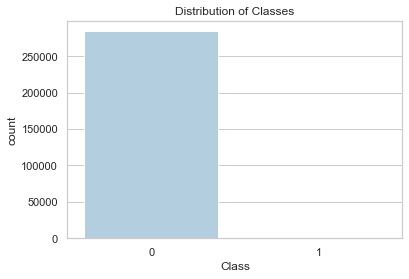

In [14]:
sns.countplot(data=df, x="Class", palette="Blues")
plt.xticks(np.arange(2), labels=['0', '1'])
plt.title('Distribution of Classes')
plt.show()

In [15]:
# Checking for class imbalance

vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

Target   Count  percent
0       0  284315    99.83
1       1     492     0.17

In [16]:
284315/492

577.8760162601626

### (A) The ratio of normal transaction to fraud transaction is 578:1 i.e, there seems to one fraud transaction for every 578 normal transactions. 
- The dataset contains 284315(99.83%) normal transactions but only 492(0.17%) fraud transactions
- The classes are highly imbalanced. So, `Accuracy` would be a bad performance measure. We should use better performance measures like **Area Under the Precision-Recall Curve (AUPRC).**

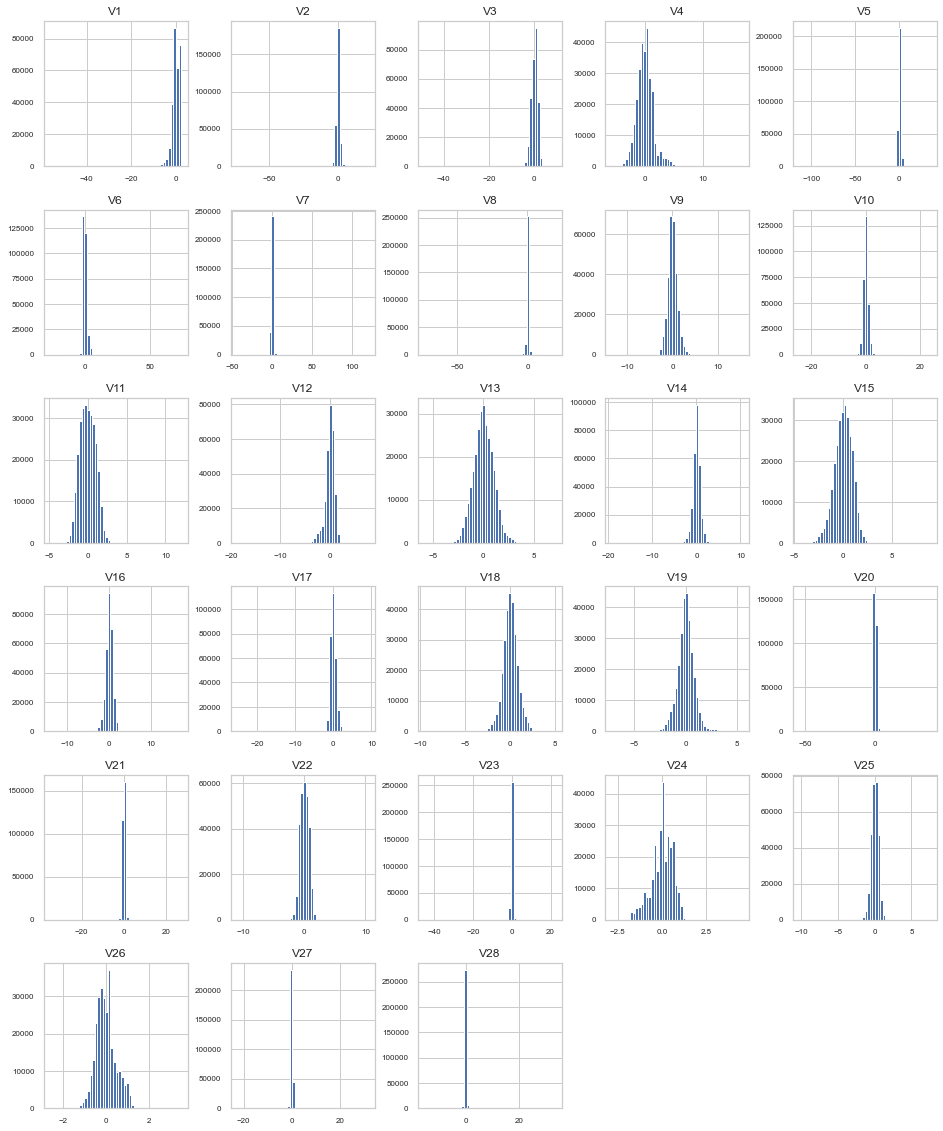

In [17]:
pca_df = df.copy()
pca_df.drop(labels=['Time', 'Amount', 'Class'], axis=1, inplace= True)
ax = pca_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Interpretations:**
From the above distributions we can observe that V1 is right skewed,V4 is slightly left skewed. V11,V13,V15,V18,V19 and V26 are normal.

#### Scatter Plots for each Precitor variable with `Amount`

In [18]:
# for i in range(df.shape[1]-2):
#     plt.figure(figsize = (10, 6))
#     sns.scatterplot(x=df.iloc[:,i],y=df['Amount'],hue=df['Class'])
#     # sns.scatterplot(x=df.iloc[:,i],y=df['Class'])
#     # sns.scatterplot(x=df.index, y=df.iloc[:,i],hue=df['Class'])
#     plt.show()

**Interpretations:**
From the above bivariate distributions we can observe that V3,V9,V10,V11,V12,V14,V16,V17,V18 all have a clear linear separation among the classes 1 and 0.

### **1.3 Correlation**

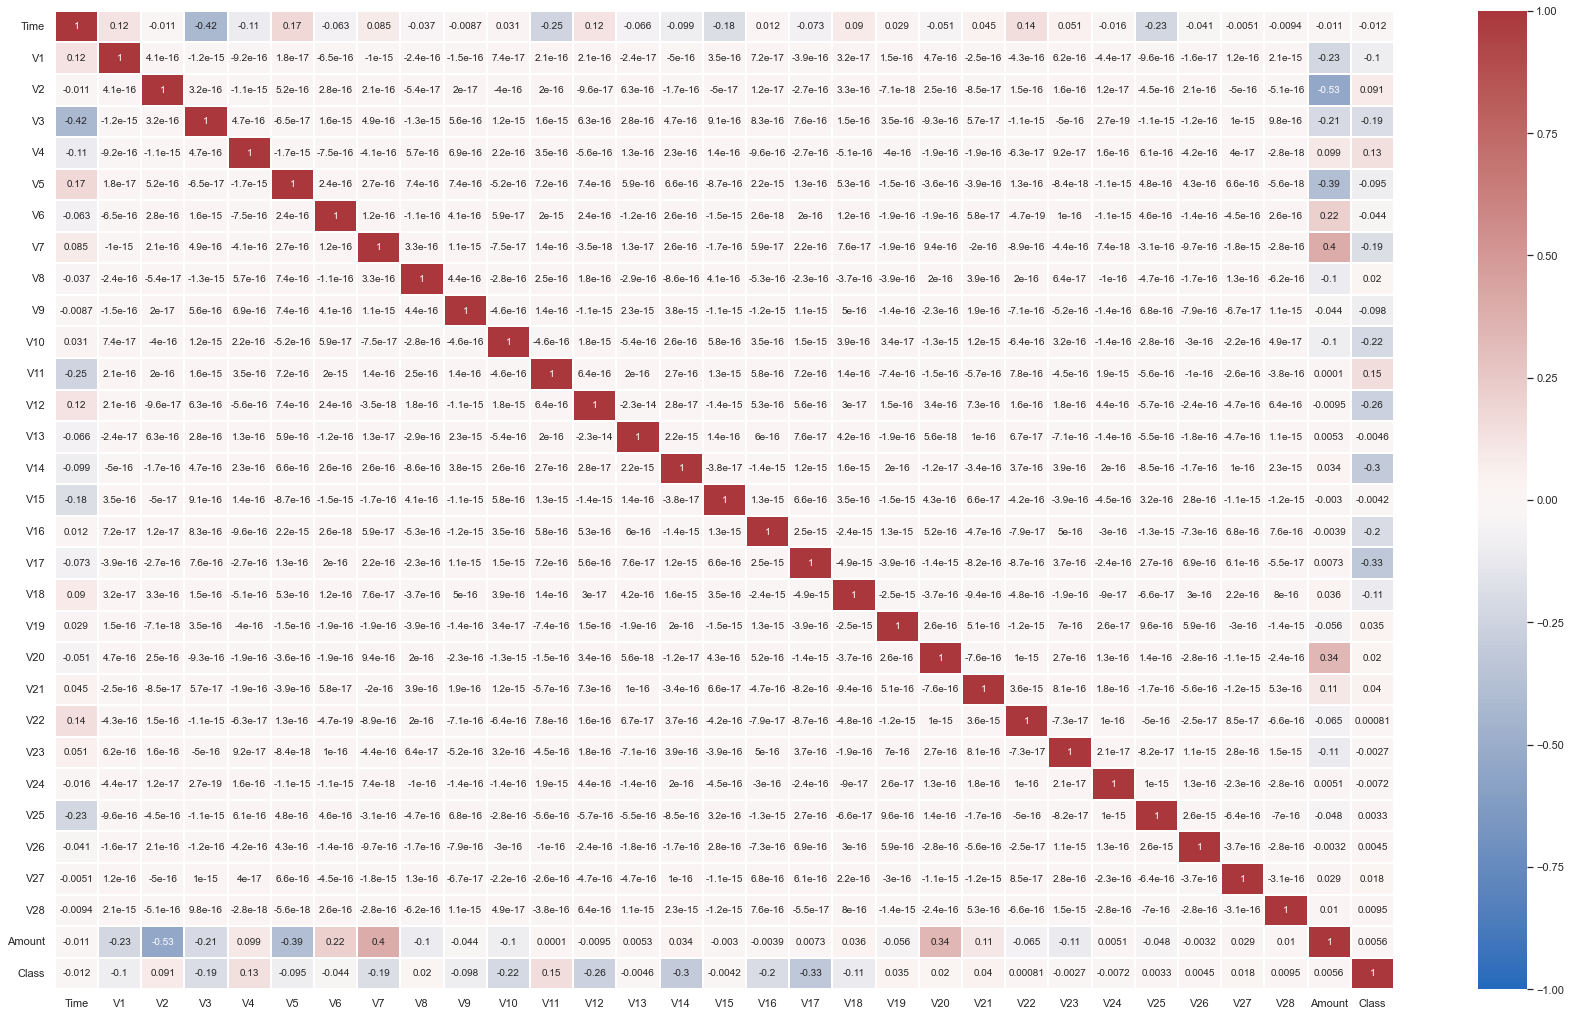

In [19]:
plt.figure(figsize=(30, 18))
corr  = df.corr()
ax = sns.heatmap(corr,cmap='vlag', vmax=1.0, vmin=-1.0, linewidths=0.1,
                 annot=True, annot_kws={"size":10},square=False)

**Observations:**
1. There seems to be a negative correlation of -0.53 between variables `V2` and `amount`.
2. There seems to be a negative correlation of =0.39 between variables `V5` and `amount`.
3. We observe that there is no correlation between `V1, `V2`,....`V28`. This is expected as they are transformed with PCA

### **1.4 PCA**

#### Computing % of explained variance by each column of {V1,..V28} (i.e, each Principal Component)

In [20]:
variances = pca_df.var()
total_var = variances.sum()
explained_var = []
cummulative_var = []
sum = 0
for i in list(pca_df.var()):
    var = np.round(i/total_var*100,2)
    explained_var.append( var)
    sum += var
    cummulative_var.append(np.round(sum,2))
pca = pd.DataFrame({'exp_variance(%)': explained_var, 'cum_variance(%)': cummulative_var}, index=list(np.arange(1,29)))
pca

exp_variance(%)  cum_variance(%)
1             12.48            12.48
2              8.87            21.35
3              7.48            28.83
4              6.52            35.35
5              6.20            41.55
6              5.78            47.33
7              4.98            52.31
8              4.64            56.95
9              3.93            60.88
10             3.86            64.74
11             3.39            68.13
12             3.25            71.38
13             3.22            74.60
14             2.99            77.59
15             2.73            80.32
16             2.50            82.82
17             2.35            85.17
18             2.29            87.46
19             2.16            89.62
20             1.93            91.55
21             1.76            93.31
22             1.71            95.02
23             1.27            96.29
24             1.19            97.48
25             0.88            98.36
26             0.76            99.12
27             0.53            99.65
28             0.35           100.00

#### 15 Principal Components explain more than 80% of the variance.

### **1.5 Visualizations**

#### Checking for similarity among normal transactions and fraud transactions

- Sampling 1000 normal transactions and all 492 fraud transactions

In [21]:
data = raw_data.copy()
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)

non_fraud = data[data['Class'] == 0].sample(n=1000, random_state = 23)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud], axis=0).sample(frac=1, random_state = 23).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).to_numpy()
Y = df["Class"].to_numpy()

#### **1.5.1 t-SNE**

**t-SNE** is visualization technique for high-dimensional data 
- It finds a way to project data into a low dimensional space(2D or 3D) so that the clustering in the high dimensional space is preserved.
- It retains similarity in data while also revealing important global structure(such as clusters at multiple scales)

#### Projecting dataset into 2-D space using t-SNE

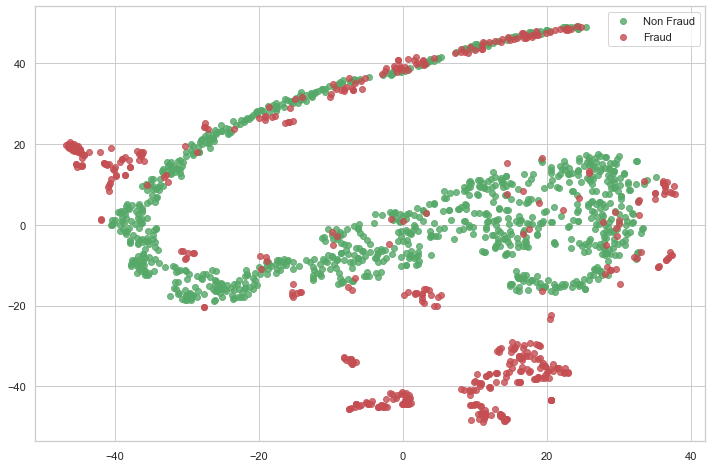

In [22]:
tsne = TSNE(n_components=2,
            random_state=23,
            n_jobs=-1,
            init = 'random',
            learning_rate='auto')
X_t = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

plt.legend(loc='best')
plt.savefig("tsne_2d.png")
plt.show()

#### Projecting dataset into 3-D space using t-SNE

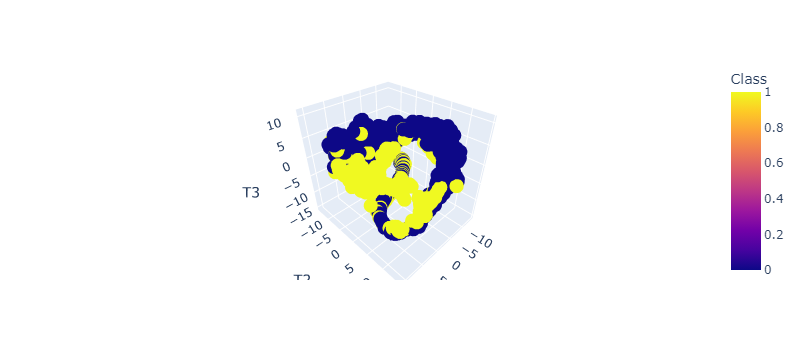

In [23]:
tsne_3d = TSNE(n_components=3,
            random_state=23,
            n_jobs=-1,
            init = 'random',
            learning_rate='auto')

X_t_3d = tsne_3d.fit_transform(X)

X_t_3d_df = pd.DataFrame(data = X_t_3d,columns = ['T1','T2','T3'])
X_t_3d_df['Class'] = Y

fig = px.scatter_3d(X_t_3d_df, x='T1', y= 'T2', z='T3',  color='Class')
fig.show()

#### **1.5.2 Multi-dimensional Scaling (MDS)**

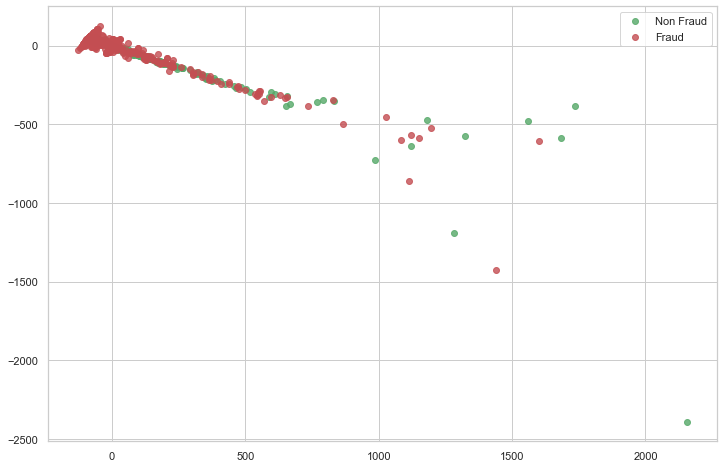

In [24]:
mds = MDS(n_components=2, random_state=23, n_jobs=-1)
X_t = mds.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

plt.legend(loc='best')
plt.savefig("MDS_2d.png")
plt.show()

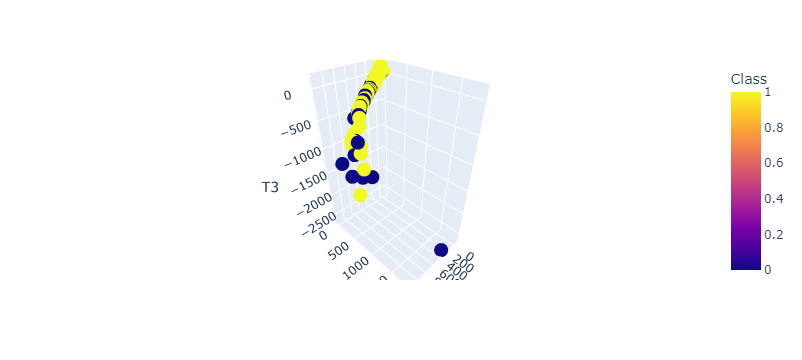

In [25]:
mds_3d = MDS(n_components=3, random_state=23, n_jobs=-1)
X_t_3d = mds_3d.fit_transform(X)

X_t_3d_df = pd.DataFrame(data = X_t_3d,columns = ['T1','T2','T3'])
X_t_3d_df['Class'] = Y

fig = px.scatter_3d(X_t_3d_df, x='T1', y= 'T2', z='T3',  color='Class')
fig.show()

**Conclusions:**
1. t-SNE plots reveal some level of clustering and similarity among normal transactions and fraudlent transactions. 